In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from collections import OrderedDict
import pickle
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt

In [2]:
import os
import zipfile
from google.colab import files

In [4]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using:', device)


Using: cuda


In [6]:
!ln -s "/drive/MyDrive/LeafDisease" "/content/LeafDisease"

In [7]:
%run "/content/LeafDisease/dataset/datasetup.py"

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
ln: failed to create symbolic link '/content/LeafDisease/LeafDisease': File exists
Using: cuda
/drive/MyDrive/LeafDisease
best_model.pth			     LeafNetv2_confusion_matrix.png
binary_classification		     LeafNetv2_history.pkl
dataset				     LeafNetv2_roc_curve.png
DenseNet121_confusion_matrix.png     LeafNetv2_training_history.png
DenseNet121_history.pkl		     MobileNetV2_confusion_matrix.png
DenseNet121_roc_curve.png	     MobileNetV2_history.pkl
DenseNet121_training_history.png     MobileNetV2_roc_curve.png
EfficientNetB0_confusion_matrix.png  MobileNetV2_training_history.png
EfficientNetB0_history.pkl	     models
EfficientNetB0_roc_curve.png	     multi_classification
EfficientNetB0_training_history.png  plantdisease.zip
lables.csv			     PlantVillage
LeafDisease			     ResNet50_confusion_matrix.png
LeafNet_confusion_matrix.png	     ResNet50_history.pkl
LeafNet_history.pkl	

In [8]:
class_names = ["healthy", "Anthracnose", "Bacterial Blight", "Black Spot", "Citrus Canker", "Citrus Hindu Mite", "Citrus Leafminer", "Curl Leaf", "Deficiency", "Dry Leaf", "Greening", "Melanose", "Sooty Mould", "Spider Mites"]

In [9]:
%run "/content/LeafDisease/multi_classification/train.ipynb"
trainer = MultiClassClassifierTrainer(device, class_names = class_names)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
ln: failed to create symbolic link '/content/LeafDisease/LeafDisease': File exists
best_model.pth			     LeafNetv2_confusion_matrix.png
binary_classification		     LeafNetv2_history.pkl
dataset				     LeafNetv2_roc_curve.png
DenseNet121_confusion_matrix.png     LeafNetv2_training_history.png
DenseNet121_history.pkl		     MobileNetV2_confusion_matrix.png
DenseNet121_roc_curve.png	     MobileNetV2_history.pkl
DenseNet121_training_history.png     MobileNetV2_roc_curve.png
EfficientNetB0_confusion_matrix.png  MobileNetV2_training_history.png
EfficientNetB0_history.pkl	     models
EfficientNetB0_roc_curve.png	     multi_classification
EfficientNetB0_training_history.png  plantdisease.zip
lables.csv			     PlantVillage
LeafDisease			     ResNet50_confusion_matrix.png
LeafNet_confusion_matrix.png	     ResNet50_history.pkl
LeafNet_history.pkl		     ResNet50_roc_curve.png
LeafNet_ro

In [10]:

%run "/content/LeafDisease/models/densenet121.py"
%run "/content/LeafDisease/models/efficientnetb0.py"
%run "/content/LeafDisease/models/mobilenetv2.py"
%run "/content/LeafDisease/models/leafnetv2.py"
%run "/content/LeafDisease/models/leafnet.py"
%run "/content/LeafDisease/models/resnet50.py"



cuda


In [11]:
models_info = []
label_csv = '/content/LeafDisease/dataset/lables.csv'
# 1. ResNet
resnet = ResNetClassifier(mode="multiclass", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("ResNet50", resnet.get_model(), resnet.get_criterion(), resnet.get_optimizer()))

# 2. EfficientNet
effnet = EfficientNetClassifier(mode="multiclass", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("EfficientNetB0", effnet.get_model(), effnet.get_criterion(), effnet.get_optimizer()))

# 3. MobileNetV2
mobilenet = MobileNetV2Classifier(mode="multiclass", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("MobileNetV2", mobilenet.get_model(), mobilenet.get_criterion(), mobilenet.get_optimizer()))

# 4. DenseNet (yours is defined directly)
densenet = DenseNet121Classifier(mode="multiclass", label_csv_path=label_csv, freeze_backbone=True)
models_info.append(("DenseNet121", densenet.get_model(), densenet.get_criterion(),  densenet.get_optimizer()))

#5. LeafNet (custom hybrid)
leafnet = LeafNet(n_class=14)  # binary = 2 classes
criterion_leaf = nn.CrossEntropyLoss()
optimizer_leaf = torch.optim.Adam(leafnet.parameters(), lr=1e-4)
models_info.append(("LeafNet", leafnet.to(device), criterion_leaf, optimizer_leaf))

# 6. LeafNetv2 (custom hybrid)
leafnet2 = LeafNetv2(n_class=14)
criterion_leaf2 = nn.CrossEntropyLoss()
optimizer_leaf2 = torch.optim.Adam(leafnet2.parameters(), lr=1e-4)
models_info.append(("LeafNetv2", leafnet2.to(device), criterion_leaf2, optimizer_leaf2))

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 204MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 122MB/s] 
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 113MB/s] 
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 156MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:02<00:00, 217MB/s]
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/476M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model.safetensors:   0%|          | 0.00/28.8M [00:00<?, ?B/s]

In [ ]:
"""
Training all modles below
"""


===== Training ResNet50 =====

Epoch 1/20
train Loss: 1.8874 | Acc: 0.3509
val Loss: 1.6552 | Acc: 0.4339 | F1 Macro: 0.2822 | F1 Weighted: 0.3854

Epoch 2/20
train Loss: 1.6166 | Acc: 0.4324
val Loss: 1.5878 | Acc: 0.4495 | F1 Macro: 0.3433 | F1 Weighted: 0.4349

Epoch 3/20
train Loss: 1.5585 | Acc: 0.4473
val Loss: 1.6189 | Acc: 0.4367 | F1 Macro: 0.3094 | F1 Weighted: 0.4108

Epoch 4/20
train Loss: 1.5094 | Acc: 0.4580
val Loss: 1.5681 | Acc: 0.4751 | F1 Macro: 0.3693 | F1 Weighted: 0.4600

Epoch 5/20
train Loss: 1.4752 | Acc: 0.4826
val Loss: 1.4432 | Acc: 0.4865 | F1 Macro: 0.3882 | F1 Weighted: 0.4764

Epoch 6/20
train Loss: 1.4557 | Acc: 0.4854
val Loss: 1.3938 | Acc: 0.5107 | F1 Macro: 0.4433 | F1 Weighted: 0.5020

Epoch 7/20
train Loss: 1.4405 | Acc: 0.4875
val Loss: 1.4634 | Acc: 0.4865 | F1 Macro: 0.4019 | F1 Weighted: 0.4751

Epoch 8/20
train Loss: 1.4270 | Acc: 0.4833
val Loss: 1.5046 | Acc: 0.4936 | F1 Macro: 0.3850 | F1 Weighted: 0.4622

Epoch 9/20
train Loss: 1.4006 | 

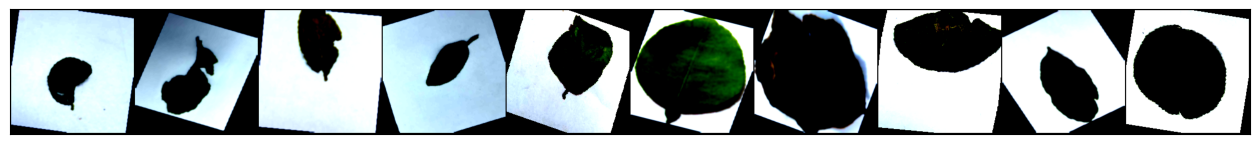

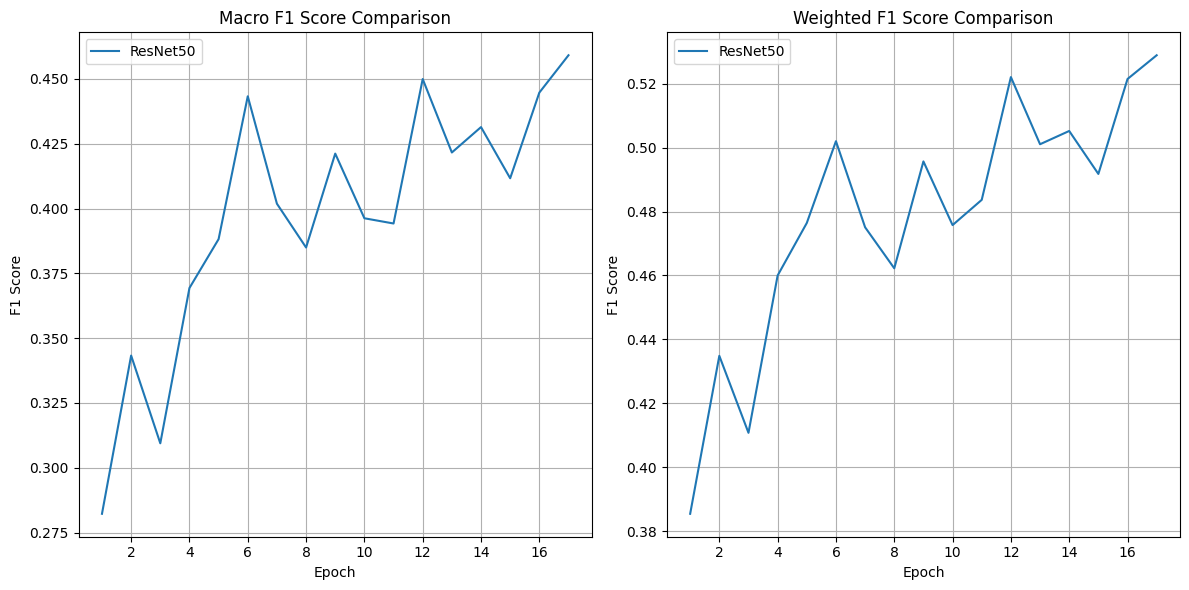

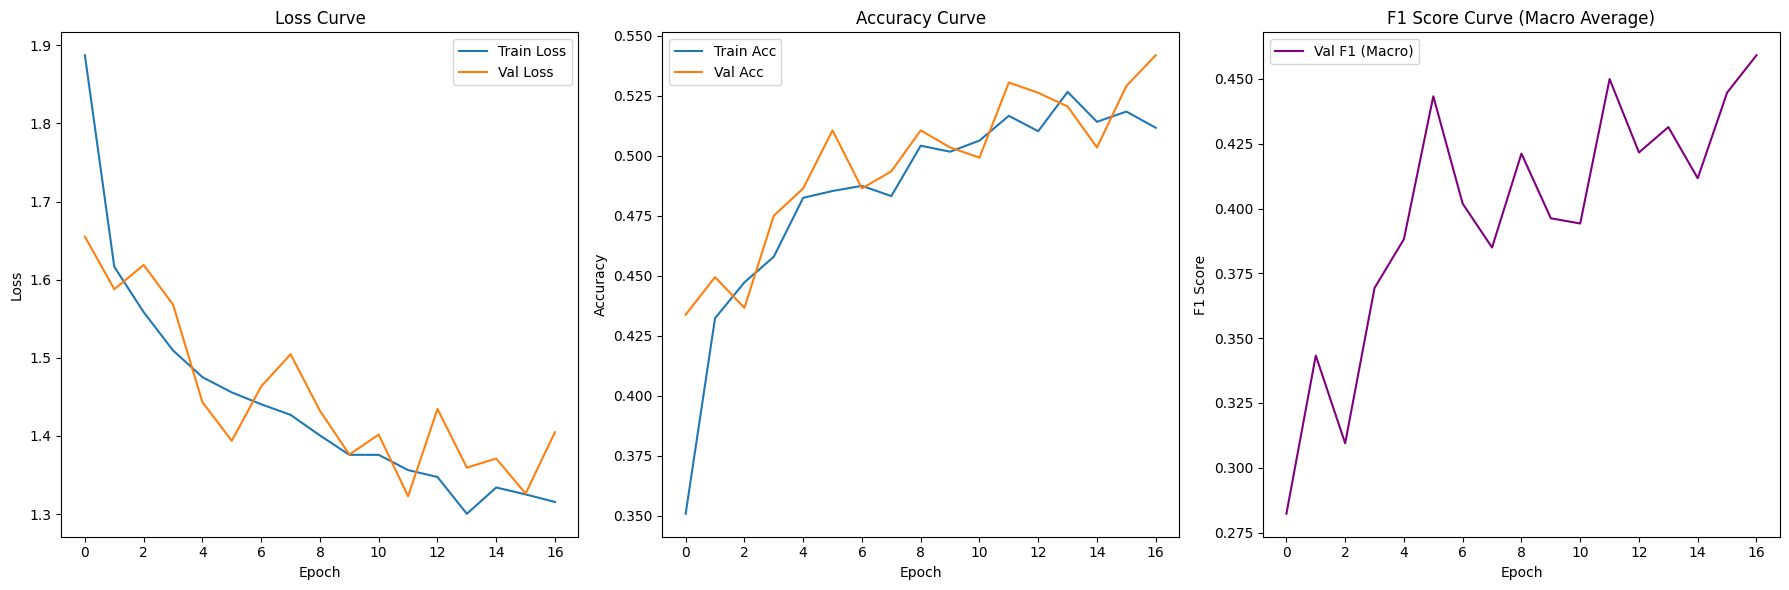

Confusion Matrix:
 [[19  0  0  0  0  1  0  0  0  0 28  0  0  1]
 [ 2 18  0  0  7  3  1  2  1  1 11  1  0  4]
 [ 0  0  6  1  0  2  0  2  4  2  1  1  0  2]
 [ 0  1  3  3  3  0  0  0  0  5  0  4  2  0]
 [ 1 10  2  0 34  0  3  2  0  0  5  3  0  0]
 [ 0  4  1  0  0 76  0  4  2  2 10  1  1 14]
 [ 1  3  0  0  6  0  5  4  1  0  1  0  0  1]
 [ 0  3  2  1  0  1  0 38  0  7  8  0  0  2]
 [ 0  2  5  1  2  4  0  6 25  5  6  2  1  5]
 [ 0  0  0  0  0  0  0  0  0 27  0  1  0  0]
 [ 4  2  1  0  3  1  0  1  5  6 92  3  0  3]
 [ 0  0  1  0  1  0  0  0  1  3 23 12  0  2]
 [ 0  1  2  0  0  4  0  1  1  6  4  1  6  0]
 [ 0  3  1  0  0  1  0  0  1  0  1  1  0 12]]


NameError: name 'accuracy_score' is not defined

In [12]:
all_histories = {}
trained_models = []

for name, model, criterion, optimizer in models_info:
    print(f"\n===== Training {name} =====")
    model, history, y_true, y_pred = trainer.train(
        model, criterion, optimizer,
        {"train":train_dl,"val":test_dl}, {"train":train_data, "val":test_data},
        num_epochs=20, patience=5,
        save_path=f"{name}_history.pkl"
    )

    # save history + trained model
    all_histories[name] = history
    trained_models.append((name, model))

    # plots per model
    trainer.plot_f1_curves(all_histories)
    trainer.plot_history(history, model_name=name)
    trainer.eval_plot(y_true, y_pred, model_name=name)
    trainer.plot_roc(model, test_dl, model_name=name)

